<a href="https://colab.research.google.com/github/anuragsingh472002/bis-lab-code/blob/main/grey_wolf_opt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generation 1: Best fitness = 14.410071907478544
Generation 2: Best fitness = 9.055214655564894
Generation 3: Best fitness = 2.758178450369865
Generation 4: Best fitness = 2.758178450369865
Generation 5: Best fitness = 2.758178450369865
Generation 6: Best fitness = 2.758178450369865
Generation 7: Best fitness = 2.758178450369865
Generation 8: Best fitness = 2.758178450369865
Generation 9: Best fitness = 2.758178450369865
Generation 10: Best fitness = 2.758178450369865
Generation 11: Best fitness = 2.758178450369865
Generation 12: Best fitness = 2.758178450369865
Generation 13: Best fitness = 2.3864030780125205
Generation 14: Best fitness = 2.3864030780125205
Generation 15: Best fitness = 2.3864030780125205
Generation 16: Best fitness = 2.3864030780125205
Generation 17: Best fitness = 2.3864030780125205
Generation 18: Best fitness = 2.3864030780125205
Generation 19: Best fitness = 2.3864030780125205
Generation 20: Best fitness = 2.3864030780125205
Generation 21: Best fitness = 2.38640307

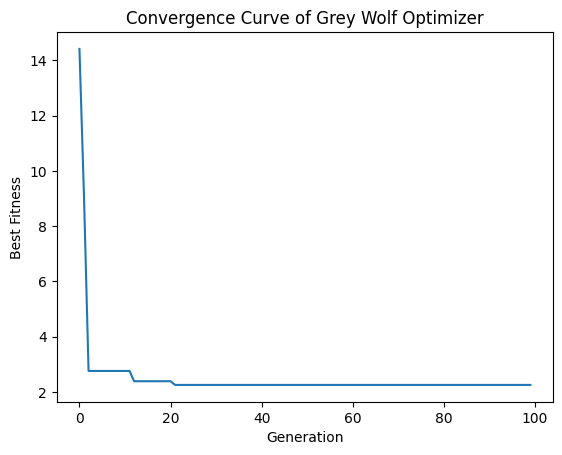

Best solution found: [-5.12        2.46751469]
Best fitness: 2.252603356706885


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Objective function: Rastrigin Function
def rastrigin(x):
    A = 10
    return A * len(x) + sum(xi**2 - A * np.cos(2 * np.pi * xi) for xi in x)

# Grey Wolf Optimizer Class
class GreyWolfOptimizer:
    def __init__(self, func, dim, population_size, max_generations, lower_bound=-5.12, upper_bound=5.12):
        self.func = func  # Objective function to minimize
        self.dim = dim  # Number of dimensions of the problem
        self.population_size = population_size  # Number of wolves in the population
        self.max_generations = max_generations  # Number of generations to run the algorithm
        self.lower_bound = lower_bound  # Lower bound of the search space
        self.upper_bound = upper_bound  # Upper bound of the search space

        # Initialize population
        self.population = np.random.uniform(self.lower_bound, self.upper_bound, (self.population_size, self.dim))
        self.fitness = np.array([self.func(wolf) for wolf in self.population])

        # Initialize the positions of Alpha, Beta, and Delta wolves
        self.alpha_position = np.copy(self.population[0])
        self.beta_position = np.copy(self.population[1])
        self.delta_position = np.copy(self.population[2])

        self.alpha_fitness = np.inf
        self.beta_fitness = np.inf
        self.delta_fitness = np.inf

    def update_positions(self, iteration):
        # Update the positions of Alpha, Beta, and Delta wolves based on hunting behavior
        A = 2 * np.random.rand(self.population_size, self.dim) - 1  # Coefficient A
        C = 2 * np.random.rand(self.population_size, self.dim)  # Coefficient C

        # Update each wolf's position based on the best wolves (Alpha, Beta, Delta)
        for i in range(self.population_size):
            r1 = np.random.rand(self.dim)
            r2 = np.random.rand(self.dim)

            # Calculate distance to Alpha, Beta, Delta
            D_alpha = np.abs(C[0] * self.alpha_position - self.population[i])
            D_beta = np.abs(C[1] * self.beta_position - self.population[i])
            D_delta = np.abs(C[2] * self.delta_position - self.population[i])

            # Update the position of the wolf using the hunting equation
            self.population[i] = self.population[i] - A[i] * (D_alpha + D_beta + D_delta)

            # Apply boundary constraints
            self.population[i] = np.clip(self.population[i], self.lower_bound, self.upper_bound)

    def search(self):
        history = []  # Store the best fitness over generations

        for generation in range(self.max_generations):
            # Evaluate fitness of the population
            for i in range(self.population_size):
                fitness_value = self.func(self.population[i])

                # Update Alpha, Beta, Delta positions based on fitness
                if fitness_value < self.alpha_fitness:
                    self.alpha_fitness = fitness_value
                    self.alpha_position = self.population[i]
                elif fitness_value < self.beta_fitness:
                    self.beta_fitness = fitness_value
                    self.beta_position = self.population[i]
                elif fitness_value < self.delta_fitness:
                    self.delta_fitness = fitness_value
                    self.delta_position = self.population[i]

            # Update the positions of the wolves
            self.update_positions(generation)

            # Record the best fitness for the current generation
            history.append(self.alpha_fitness)
            print(f"Generation {generation+1}: Best fitness = {self.alpha_fitness}")

        return self.alpha_position, self.alpha_fitness, history

# Analyze the Grey Wolf Optimizer
def analyze_gwo():
    # Parameters for the Grey Wolf Optimizer
    dim = 2
    population_size = 50
    max_generations = 100
    gwo = GreyWolfOptimizer(func=rastrigin, dim=dim, population_size=population_size, max_generations=max_generations)

    # Run the GWO
    best_position, best_fitness, history = gwo.search()

    # Plot the convergence curve
    plt.plot(history)
    plt.title("Convergence Curve of Grey Wolf Optimizer")
    plt.xlabel("Generation")
    plt.ylabel("Best Fitness")
    plt.show()

    print(f"Best solution found: {best_position}")
    print(f"Best fitness: {best_fitness}")

# Run the analysis
analyze_gwo()
